# Cleaning & Feature Engineering

In [38]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [39]:
pd.set_option('display.max_columns', 500)
df = pd.read_excel('ml_project1_data.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [40]:
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [42]:
df[df.isna().any(axis=1) == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [43]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [44]:
df.Income.fillna(df.Income.median(), inplace=True)

In [45]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [46]:
basic=df.Education == 'Basic'
df.loc[basic,'Education'] = 'HighSchool'

In [47]:
bachelors=df.Education == 'Graduation'
df.loc[bachelors,'Education'] = 'Bachelors'

In [48]:
df.Education.value_counts()

Bachelors     1127
PhD            486
Master         370
2n Cycle       203
HighSchool      54
Name: Education, dtype: int64

In [49]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [50]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [51]:
alone = df.Marital_Status == 'Alone'
yolo = df.Marital_Status == 'YOLO'
absurd = df.Marital_Status == 'Absurd'
df.loc[alone, 'Marital_Status'] = 'Single'
df.loc[yolo, 'Marital_Status'] = 'Single'
df.loc[absurd, 'Marital_Status'] = 'Single'

In [52]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%Y/%m/%d')

In [53]:
df.Dt_Customer = [x.date() for x in df.Dt_Customer]

In [54]:
df['Dt_Customer_Weekday'] = ''
df['Dt_Customer_Weekday'] = [x.weekday() for x in df.Dt_Customer]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_Weekday
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,5
2,4141,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2
3,6182,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,6


In [55]:
df.Dt_Customer[0].timetuple().tm_yday

248

In [62]:
from tqdm import tqdm_notebook
df['Season'] = ''
for i in tqdm_notebook(range(len(df))):
    if df.Dt_Customer[i].timetuple().tm_yday in range(79,172):
        df.Season[i] = 'Spring'
    elif df.Dt_Customer[i].timetuple().tm_yday in range(172,266):
        df.Season[i] = 'Summer'
    elif df.Dt_Customer[i].timetuple().tm_yday in range(266,355):
        df.Season[i] = 'Autumn'
    else:
        df.Season[i] = 'Winter'

In [58]:
df['MntWine_PerIncome'] = df.MntWines/(2*df.Income)
df['MntFruit_PerIncome'] = df.MntFruits/(2*df.Income)
df['MntMeat_PerIncome'] = df.MntMeatProducts/(2*df.Income)
df['MntFish_PerIncome'] = df.MntFishProducts/(2*df.Income)
df['MntSweet_PerIncome'] = df.MntSweetProducts/(2*df.Income)
df['MntGold_PerIncome'] = df.MntGoldProds/(2*df.Income)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_Weekday,Season,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,Summer,0.005461,0.000757,0.004696,0.001479,0.000757,0.000757
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,5,Winter,0.000119,0.000011,0.000065,0.000022,0.000011,0.000065
2,4141,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,Summer,0.002974,0.000342,0.000887,0.000775,0.000147,0.000293
3,6182,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,Winter,0.000206,0.000075,0.000375,0.000188,0.000056,0.000094
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,6,Winter,0.001484,0.000369,0.001012,0.000395,0.000232,0.000129


In [63]:
df.Season.value_counts()

Spring    594
Winter    563
Autumn    560
Summer    523
Name: Season, dtype: int64

In [64]:
df = df.rename(columns={'Season':'Dt_Customer_Season'})

In [ ]:
df.shape

In [65]:
df = df.drop('ID', axis=1)
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_Customer_Weekday', 'Dt_Customer_Season', 'MntWine_PerIncome',
       'MntFruit_PerIncome', 'MntMeat_PerIncome', 'MntFish_PerIncome',
       'MntSweet_PerIncome', 'MntGold_PerIncome'],
      dtype='object')

In [66]:
df.Z_CostContact.unique()
df.Z_Revenue.unique()
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [67]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Weekday,Dt_Customer_Season,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome
0,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,Summer,0.005461,0.000757,0.004696,0.001479,0.000757,0.000757
1,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,5,Winter,0.000119,0.000011,0.000065,0.000022,0.000011,0.000065
2,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2,Summer,0.002974,0.000342,0.000887,0.000775,0.000147,0.000293
3,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,Winter,0.000206,0.000075,0.000375,0.000188,0.000056,0.000094
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,6,Winter,0.001484,0.000369,0.001012,0.000395,0.000232,0.000129


In [71]:
marital_status_dummies = pd.get_dummies(df.Marital_Status, prefix='marital_status')
ed_dummies = pd.get_dummies(df.Education, prefix='Education')
weekday_dummies = pd.get_dummies(df.Dt_Customer_Weekday, prefix='Dt_Custom_Weekday')
season_dummies = pd.get_dummies(df.Dt_Customer_Season, prefix='Dt_Customer_Season')
df_dummies = pd.concat([df, marital_status_dummies,ed_dummies,weekday_dummies,season_dummies], axis=1)
df_dummies.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Weekday,Dt_Customer_Season,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,Education_2n Cycle,Education_Bachelors,Education_HighSchool,Education_Master,Education_PhD,Dt_Custom_Weekday_0,Dt_Custom_Weekday_1,Dt_Custom_Weekday_2,Dt_Custom_Weekday_3,Dt_Custom_Weekday_4,Dt_Custom_Weekday_5,Dt_Custom_Weekday_6,Dt_Customer_Season_Autumn,Dt_Customer_Season_Spring,Dt_Customer_Season_Summer,Dt_Customer_Season_Winter
0,1957,Bachelors,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,Summer,0.005461,0.000757,0.004696,0.001479,0.000757,0.000757,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1954,Bachelors,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,5,Winter,0.000119,0.000011,0.000065,0.000022,0.000011,0.000065,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1965,Bachelors,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2,Summer,0.002974,0.000342,0.000887,0.000775,0.000147,0.000293,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1984,Bachelors,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,Winter,0.000206,0.000075,0.000375,0.000188,0.000056,0.000094,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,6,Winter,0.001484,0.000369,0.001012,0.000395,0.000232,0.000129,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [72]:
new_df = df_dummies.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Dt_Customer_Weekday', 'Dt_Customer_Season'], axis=1)

# EDA

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

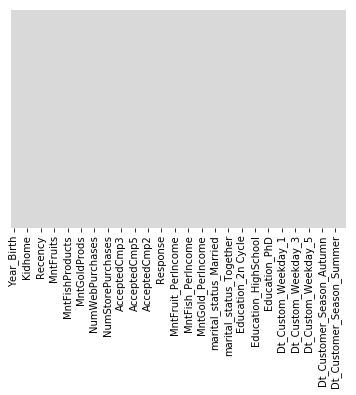

In [74]:
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')

In [75]:
new_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,Education_2n Cycle,Education_Bachelors,Education_HighSchool,Education_Master,Education_PhD,Dt_Custom_Weekday_0,Dt_Custom_Weekday_1,Dt_Custom_Weekday_2,Dt_Custom_Weekday_3,Dt_Custom_Weekday_4,Dt_Custom_Weekday_5,Dt_Custom_Weekday_6,Dt_Customer_Season_Autumn,Dt_Customer_Season_Spring,Dt_Customer_Season_Summer,Dt_Customer_Season_Winter
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.002364,0.000216,0.001408,0.000307,0.000220,0.000438,0.103571,0.385714,0.217411,0.258929,0.034375,0.090625,0.503125,0.024107,0.165179,0.216964,0.152232,0.126786,0.151339,0.138393,0.148661,0.145089,0.137500,0.250000,0.265179,0.233482,0.251339
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.002334,0.000294,0.007551,0.000397,0.000301,0.001054,0.304772,0.486872,0.412576,0.438144,0.182231,0.287139,0.500102,0.153416,0.371425,0.412270,0.359326,0.332807,0.358459,0.345389,0.355833,0.352269,0.344451,0.433109,0.441527,0.423141,0.433880
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000350,0.000021,0.000237,0.000036,0.000019,0.000104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001645,0.000099,0.000691,0.000147,0.000099,0.000258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [76]:
df.columns[:]

'Year_Birth'

In [81]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 50 columns):
Year_Birth                   2240 non-null int64
Income                       2240 non-null float64
Kidhome                      2240 non-null int64
Teenhome                     2240 non-null int64
Recency                      2240 non-null int64
MntWines                     2240 non-null int64
MntFruits                    2240 non-null int64
MntMeatProducts              2240 non-null int64
MntFishProducts              2240 non-null int64
MntSweetProducts             2240 non-null int64
MntGoldProds                 2240 non-null int64
NumDealsPurchases            2240 non-null int64
NumWebPurchases              2240 non-null int64
NumCatalogPurchases          2240 non-null int64
NumStorePurchases            2240 non-null int64
NumWebVisitsMonth            2240 non-null int64
AcceptedCmp3                 2240 non-null int64
AcceptedCmp4                 2240 non-null int64
AcceptedC

In [88]:
graph_col = new_df.columns[:29]

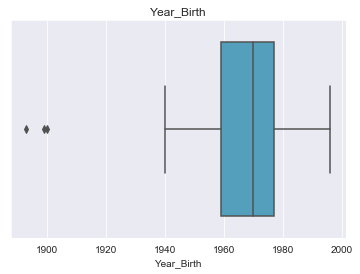

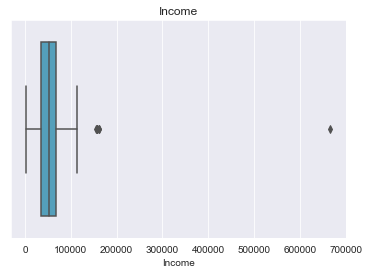

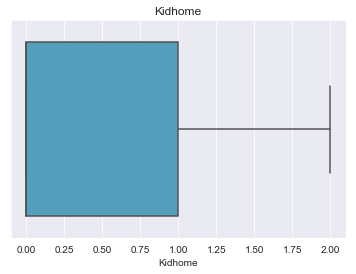

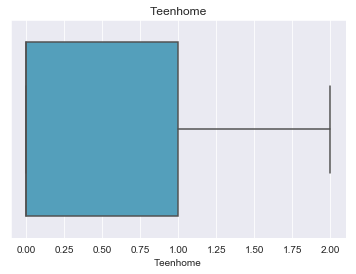

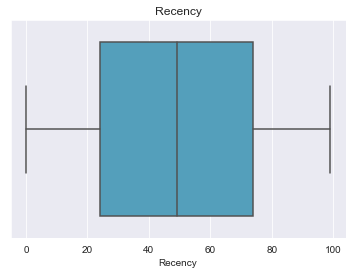

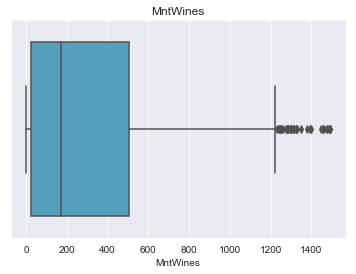

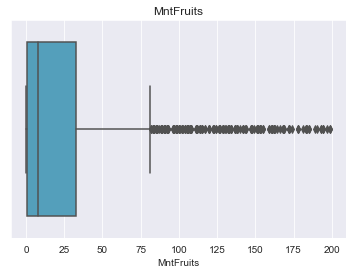

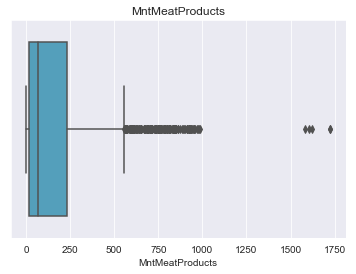

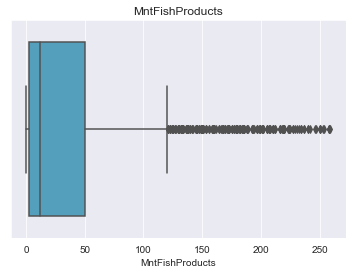

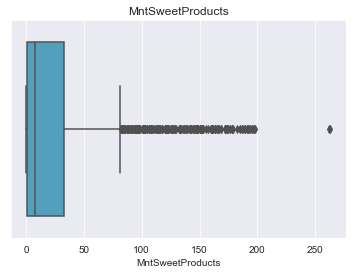

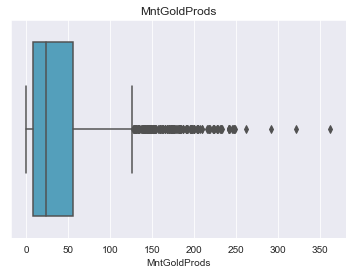

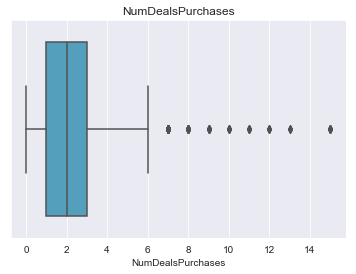

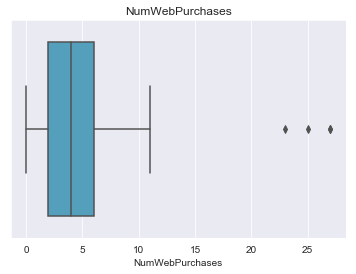

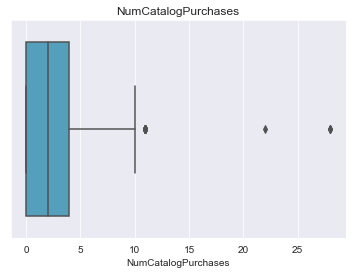

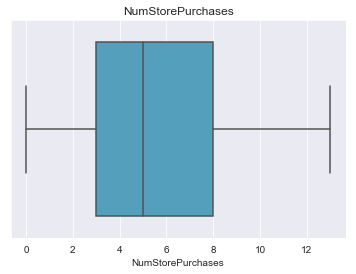

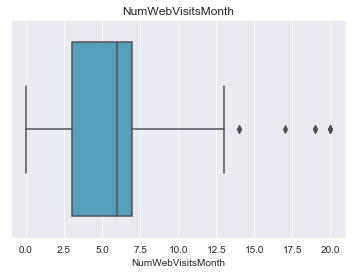

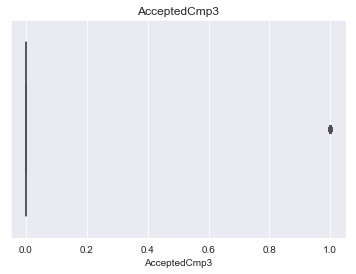

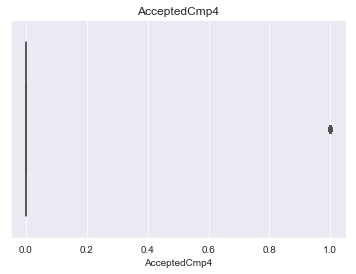

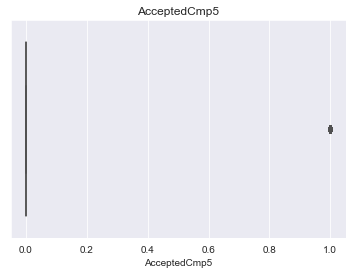

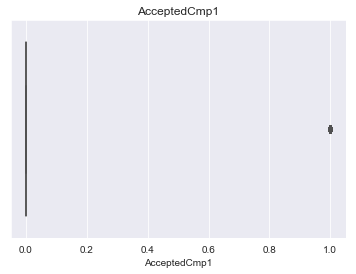

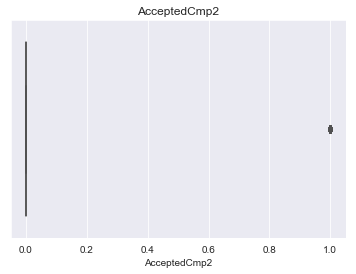

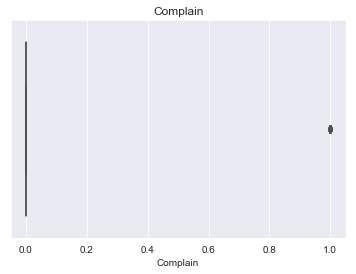

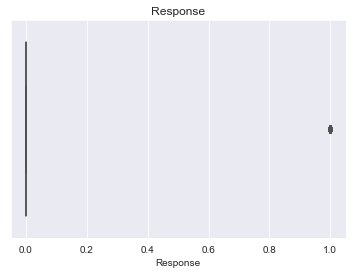

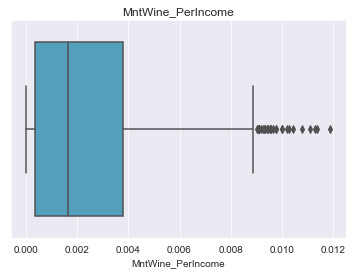

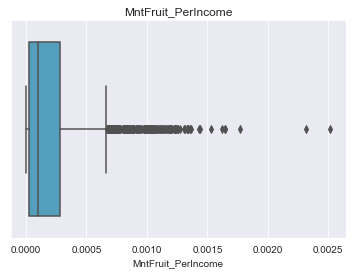

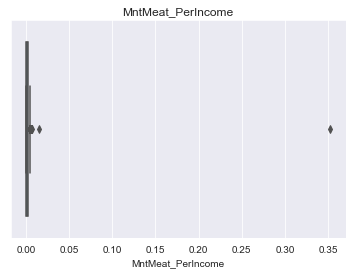

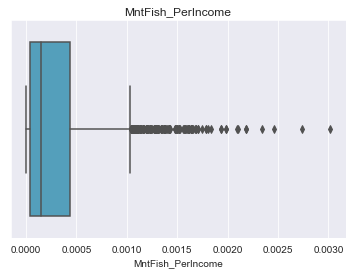

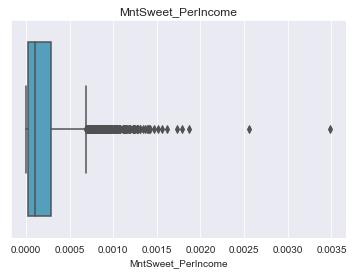

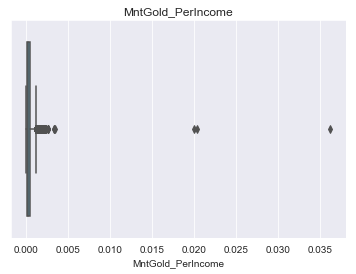

In [96]:
sns.set_style('darkgrid')
for column in graph_col:
    sns.boxplot(x = column, palette= 'GnBu_d', data = df).set_title(column)
    plt.show()

In [92]:
new_df.Income.sort_values()

1245      1730.0
21        2447.0
1524      3502.0
1846      4023.0
1975      4428.0
981       4861.0
2214      5305.0
9         5648.0
1328      6560.0
774       6835.0
1806      7144.0
439       7500.0
46        7500.0
1299      7500.0
238       7500.0
2029      7500.0
1246      7500.0
724       7500.0
862       7500.0
44        7500.0
1152      7500.0
11        7500.0
2222      7500.0
1042      8028.0
2195      8820.0
1220      8940.0
1536      9255.0
136       9548.0
1704      9722.0
385      10245.0
          ...   
426      92910.0
966      92955.0
424      93027.0
826      93404.0
1458     93790.0
943      94384.0
1301     94384.0
1993     94472.0
1982     94642.0
1473     94871.0
1001     95169.0
914      95529.0
1995     96547.0
1958     96843.0
2012     96876.0
650      98777.0
1113     98777.0
124     101970.0
203     102160.0
252     102692.0
646     105471.0
1898    113734.0
655     153924.0
2132    156924.0
1653    157146.0
164     157243.0
1300    157733.0
687     160803

In [95]:
new_df = new_df[(new_df.Income<125000) & (new_df.Income>10000)]

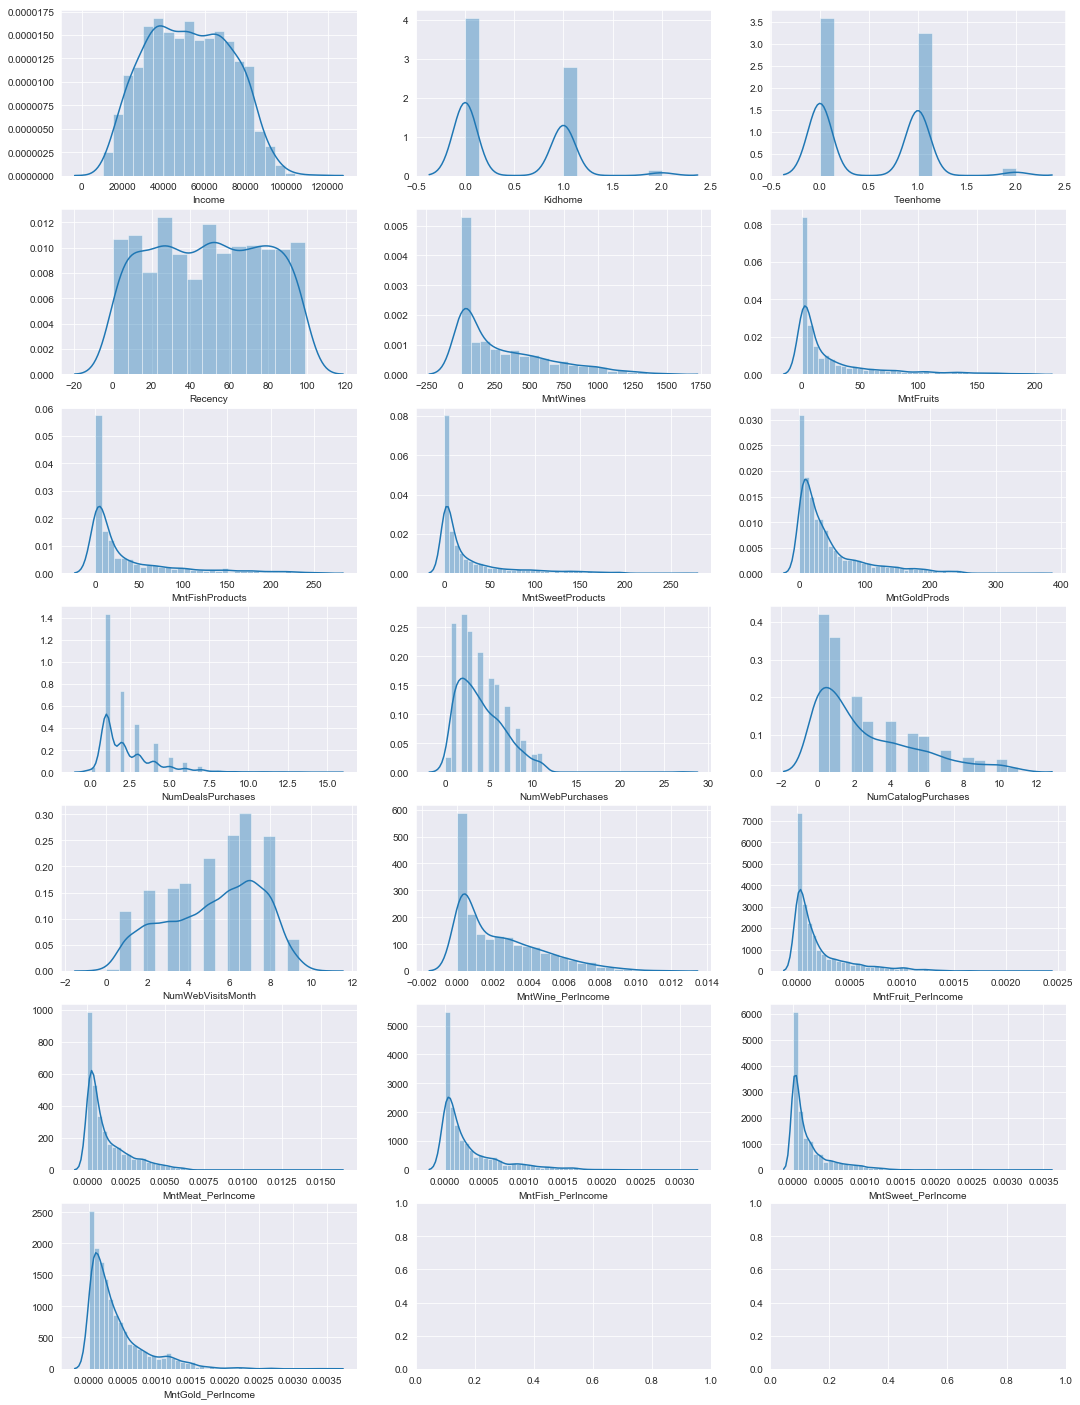

In [118]:
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12],[ax13,ax14,ax15],[ax16,ax17,ax18]
     ,[ax19,ax20,ax21]) = plt.subplots(7,3, figsize=(18,25))
sns.distplot(new_df.Income, ax=ax1)
sns.distplot(new_df.Kidhome, ax=ax2)
sns.distplot(new_df.Teenhome, ax=ax3)
sns.distplot(new_df.Recency, ax=ax4)
sns.distplot(new_df.MntWines, ax=ax5)
sns.distplot(new_df.MntFruits, ax=ax6)
sns.distplot(new_df.MntFishProducts, ax=ax7)
sns.distplot(new_df.MntSweetProducts, ax=ax8)
sns.distplot(new_df.MntGoldProds, ax=ax9)
sns.distplot(new_df.NumDealsPurchases, ax=ax10)
sns.distplot(new_df.NumWebPurchases, ax=ax11)
sns.distplot(new_df.NumCatalogPurchases, ax=ax12)
sns.distplot(new_df.NumWebVisitsMonth, ax=ax13)
sns.distplot(new_df.MntWine_PerIncome, ax=ax14)
sns.distplot(new_df.MntFruit_PerIncome, ax=ax15)
sns.distplot(new_df.MntMeat_PerIncome, ax=ax16)
sns.distplot(new_df.MntFish_PerIncome, ax=ax17)
sns.distplot(new_df.MntSweet_PerIncome, ax=ax18)
sns.distplot(new_df.MntGold_PerIncome, ax=ax19)

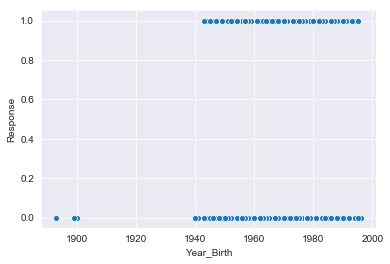

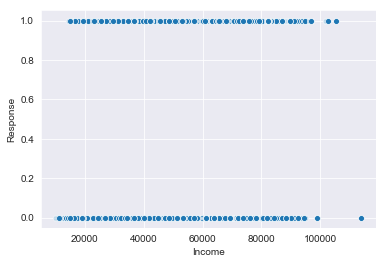

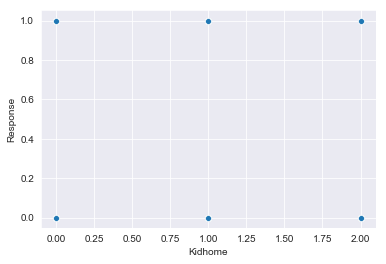

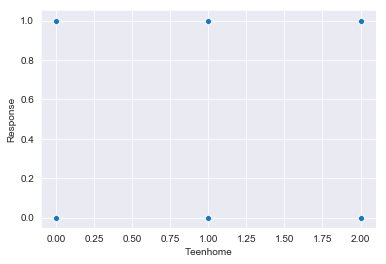

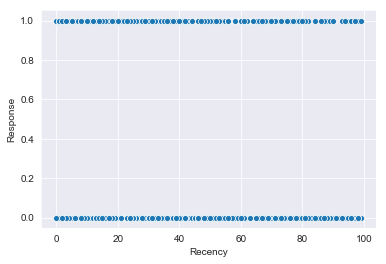

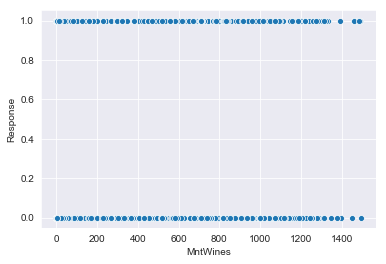

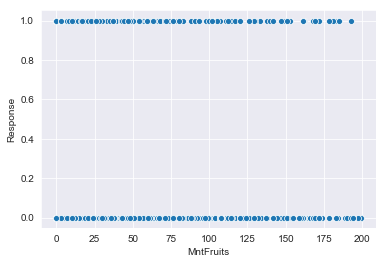

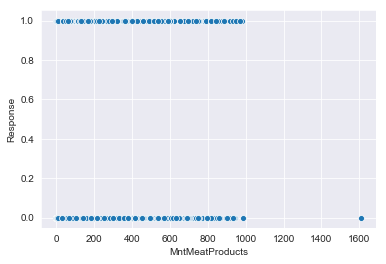

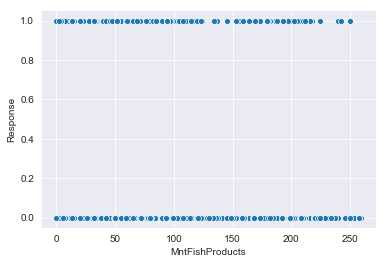

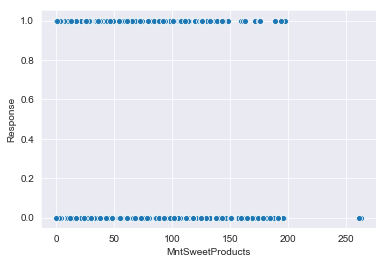

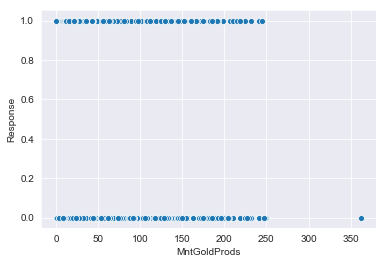

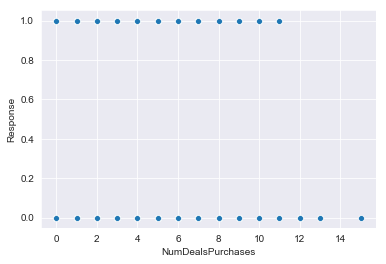

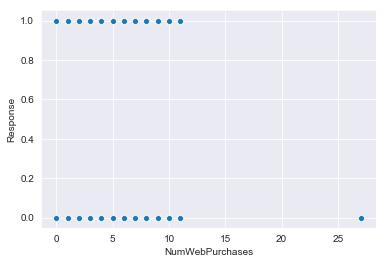

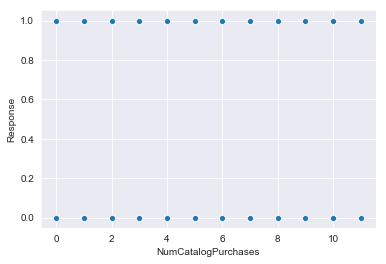

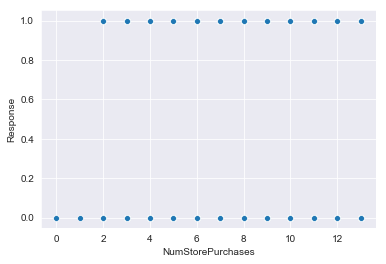

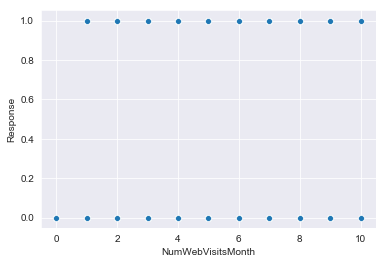

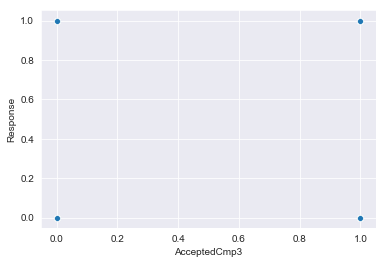

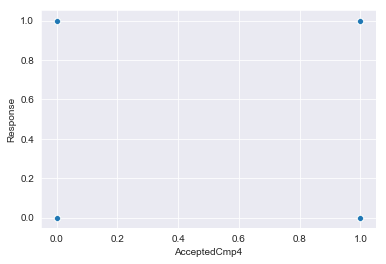

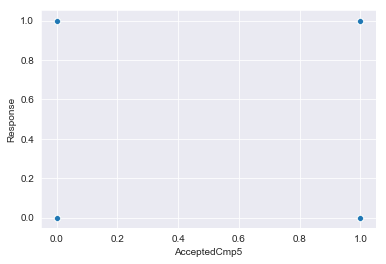

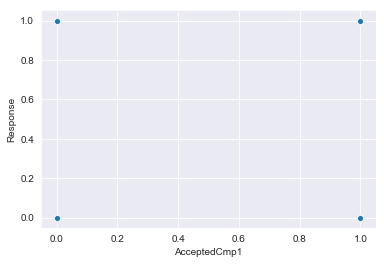

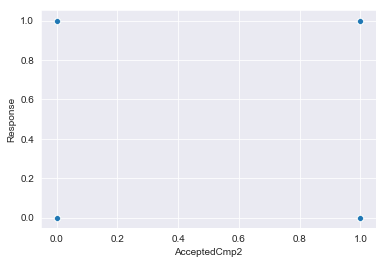

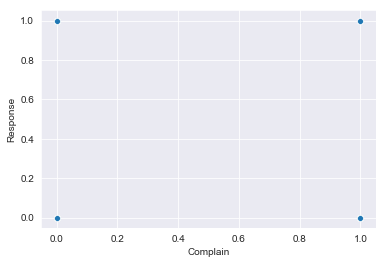

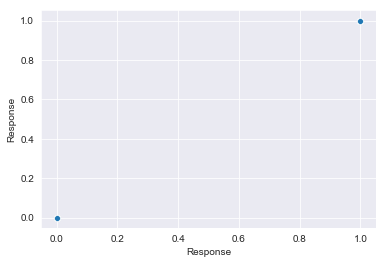

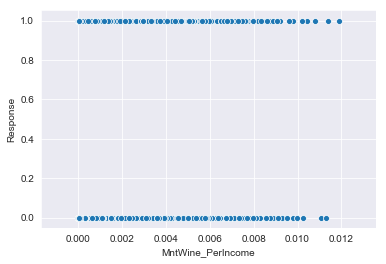

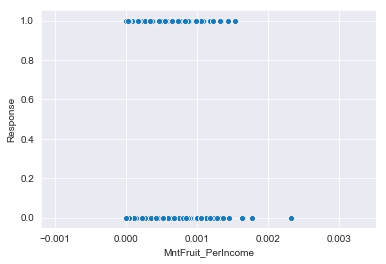

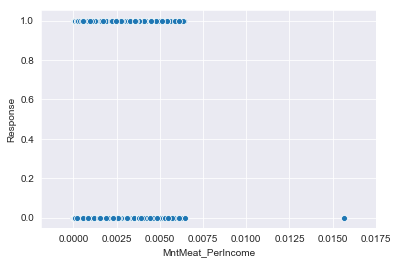

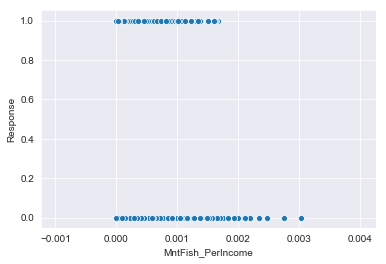

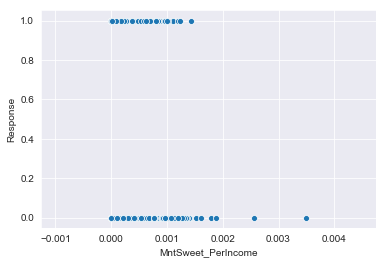

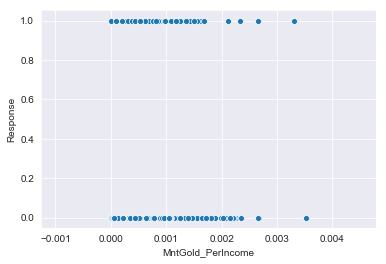

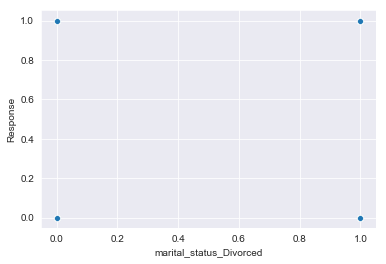

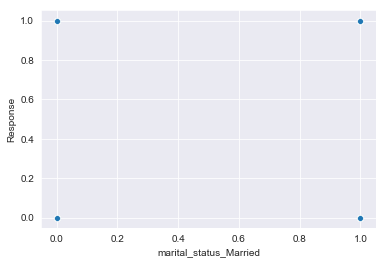

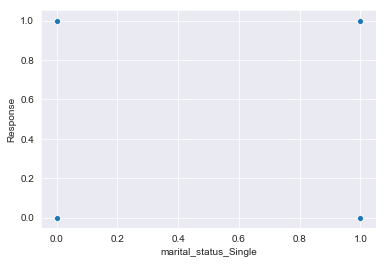

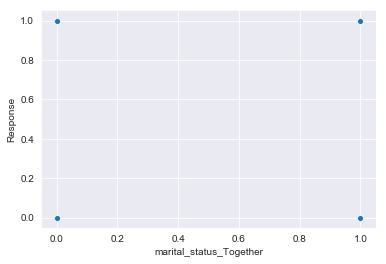

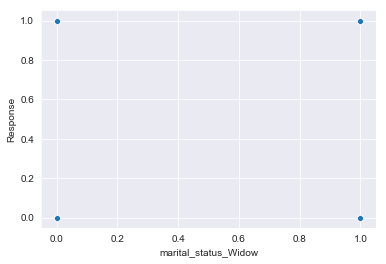

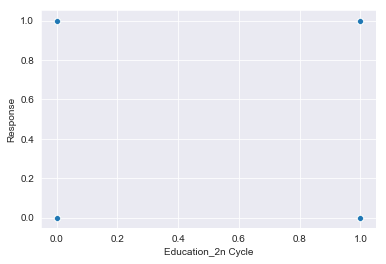

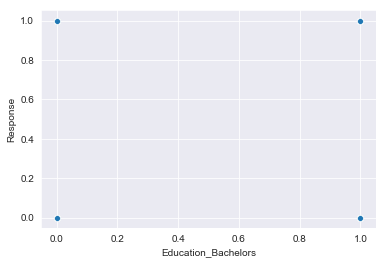

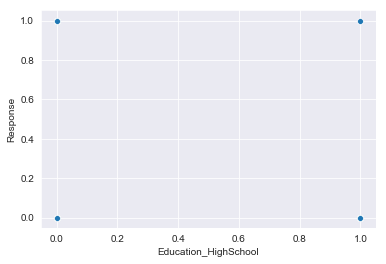

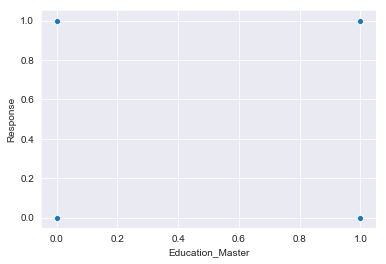

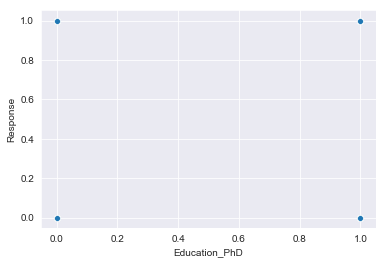

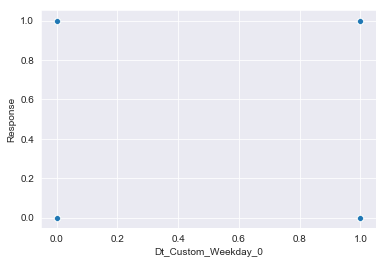

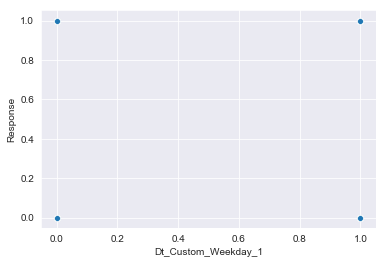

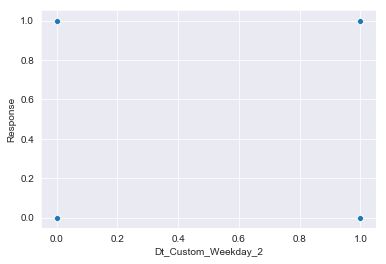

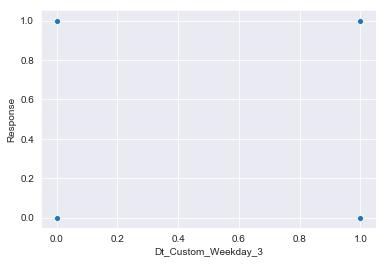

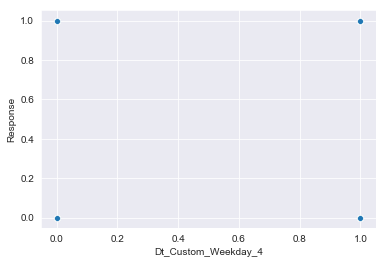

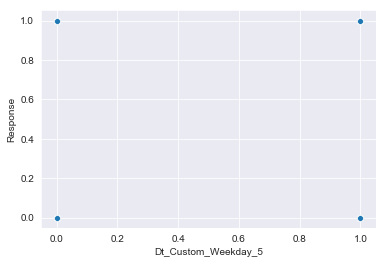

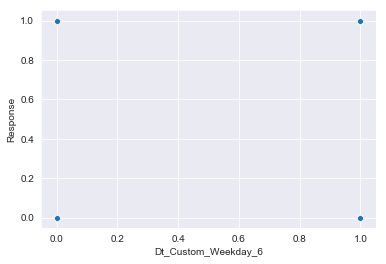

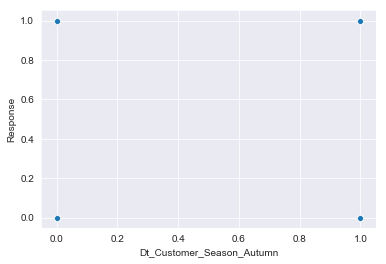

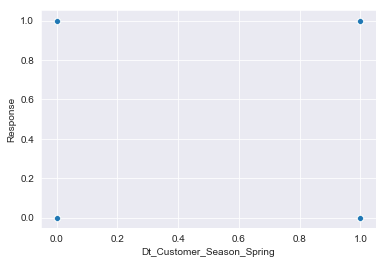

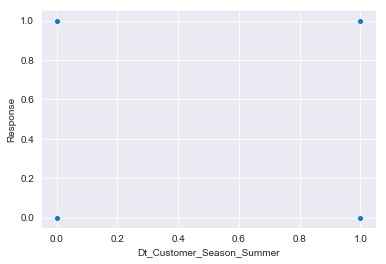

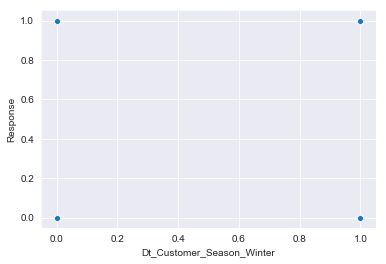

In [123]:
for col in new_df.columns:
    sns.scatterplot(x=col, y=new_df.Response, data=new_df)
    plt.show()

In [164]:
new_df.Recency = df.Recency
transform_df = new_df.copy()

In [150]:
transform_df.Recency.isnull().sum()

0

In [165]:
transform_df.MntWines = np.where(transform_df.MntWines!=0, transform_df.MntWines.transform(np.log),0)

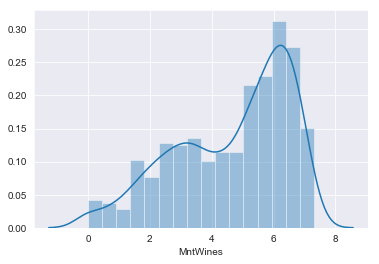

In [166]:
sns.distplot(transform_df.MntWines)

In [167]:
transform_df.MntFruits = np.where(transform_df.MntFruits!=0, transform_df.MntFruits.transform(np.log),0)
transform_df.MntMeatProducts = np.where(transform_df.MntMeatProducts!=0, transform_df.MntMeatProducts.transform(np.log),0)
transform_df.MntFishProducts = np.where(transform_df.MntFishProducts!=0, transform_df.MntFishProducts.transform(np.log),0)
transform_df.MntSweetProducts = np.where(transform_df.MntSweetProducts!=0, transform_df.MntSweetProducts.transform(np.log),0)
transform_df.MntGoldProds = np.where(transform_df.MntGoldProds!=0, transform_df.MntGoldProds.transform(np.log),0)

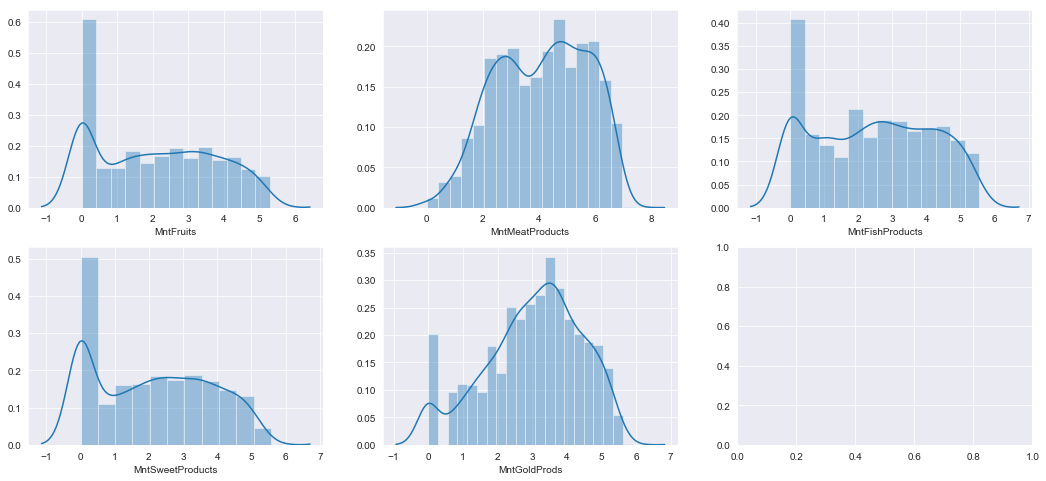

In [168]:
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3,figsize=(18,8))
sns.distplot(transform_df.MntFruits, ax=ax1)
sns.distplot(transform_df.MntMeatProducts, ax=ax2)
sns.distplot(transform_df.MntFishProducts, ax=ax3)
sns.distplot(transform_df.MntSweetProducts, ax=ax4)
sns.distplot(transform_df.MntGoldProds, ax=ax5)

In [169]:
transform_df.MntWine_PerIncome = np.where(transform_df.MntWine_PerIncome!=0, transform_df.MntWine_PerIncome.transform(np.log),0)
transform_df.MntFruit_PerIncome = np.where(transform_df.MntFruit_PerIncome!=0, transform_df.MntFruit_PerIncome.transform(np.log),0)
transform_df.MntMeat_PerIncome = np.where(transform_df.MntMeat_PerIncome!=0, transform_df.MntMeat_PerIncome.transform(np.log),0)
transform_df.MntFish_PerIncome = np.where(transform_df.MntFish_PerIncome!=0, transform_df.MntFish_PerIncome.transform(np.log),0)
transform_df.MntSweet_PerIncome = np.where(transform_df.MntSweet_PerIncome!=0, transform_df.MntSweet_PerIncome.transform(np.log),0)
transform_df.MntGold_PerIncome = np.where(transform_df.MntGold_PerIncome!=0, transform_df.MntGold_PerIncome.transform(np.log),0)

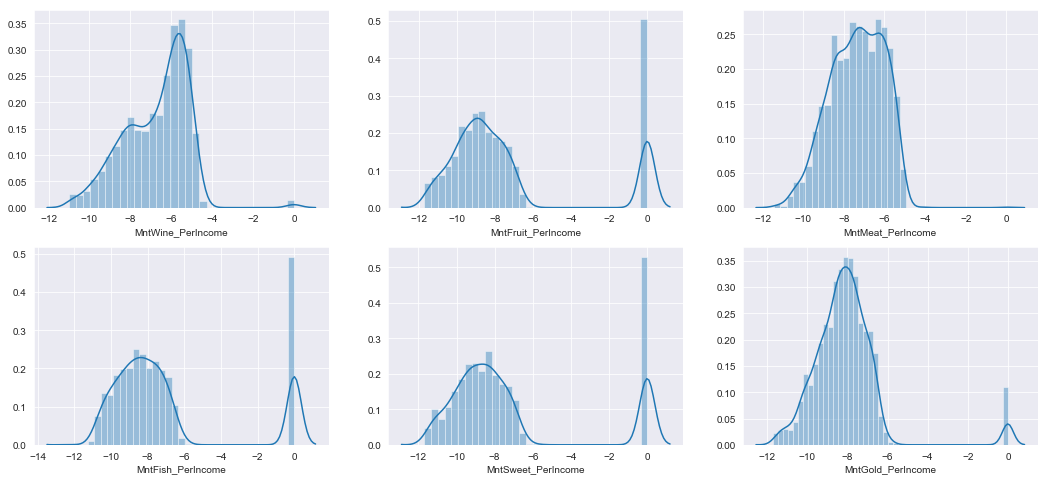

In [170]:
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3,figsize=(18,8))
sns.distplot(transform_df.MntWine_PerIncome, ax=ax1)
sns.distplot(transform_df.MntFruit_PerIncome, ax=ax2)
sns.distplot(transform_df.MntMeat_PerIncome, ax=ax3)
sns.distplot(transform_df.MntFish_PerIncome, ax=ax4)
sns.distplot(transform_df.MntSweet_PerIncome, ax=ax5)
sns.distplot(transform_df.MntGold_PerIncome, ax=ax6)

In [176]:
len(transform_df[(transform_df.MntFruit_PerIncome == 0) & (transform_df.MntFish_PerIncome == 0) & (transform_df.MntSweet_PerIncome == 0)])

157

In [174]:
transform_df1 = transform_df.drop(transform_df[(transform_df.MntFruit_PerIncome == 0) & 
                                               (transform_df.MntFish_PerIncome == 0) & 
                                               (transform_df.MntSweet_PerIncome == 0)].index)

In [177]:
len(transform_df) - len(transform_df1)

157

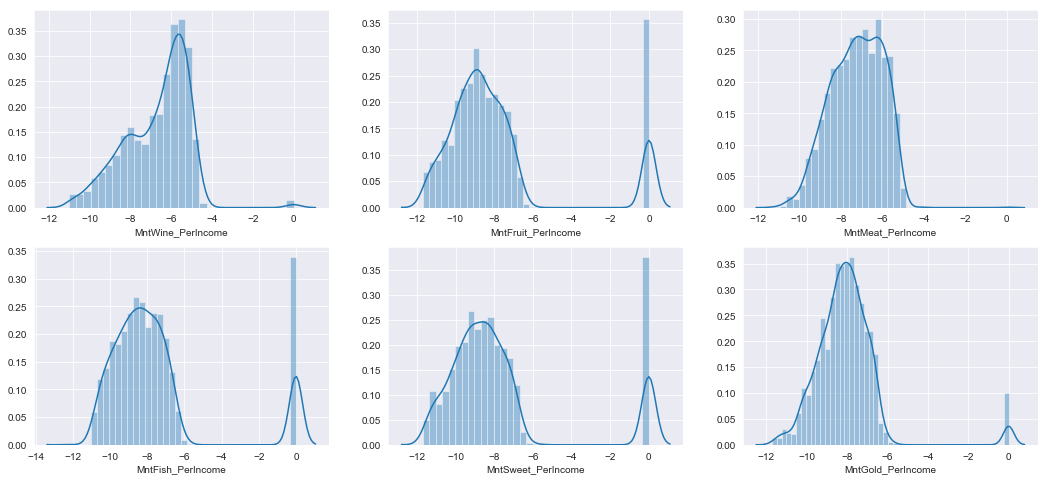

In [178]:
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3,figsize=(18,8))
sns.distplot(transform_df1.MntWine_PerIncome, ax=ax1)
sns.distplot(transform_df1.MntFruit_PerIncome, ax=ax2)
sns.distplot(transform_df1.MntMeat_PerIncome, ax=ax3)
sns.distplot(transform_df1.MntFish_PerIncome, ax=ax4)
sns.distplot(transform_df1.MntSweet_PerIncome, ax=ax5)
sns.distplot(transform_df1.MntGold_PerIncome, ax=ax6)

In [179]:
len(transform_df.columns)

50

In [180]:
df.to_csv('df_no_dummies.csv')
new_df.to_csv('df_no_transform.csv')
transform_df.to_csv('df_trasnform_zeroes_included.csv')
transform_df1.to_csv('df_transform_zeroes_excluded.csv')